In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import pandas as pd
import numpy as np
import os

In [13]:
zip_path = r"C:\Users\ncc45554\Downloads\wine+quality.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.printdir()


File Name                                             Modified             Size
winequality-red.csv                            2023-05-22 22:24:00        84199
winequality-white.csv                          2023-05-22 22:24:00       264426
winequality.names                              2023-05-22 22:24:00         3305


In [14]:
with zipfile.ZipFile(zip_path) as z:
    with z.open("winequality-white.csv") as f:
      white_wine = pd.read_csv(f, sep=";")

In [15]:

df = white_wine.copy()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [16]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [17]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


In [18]:
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

| Numeric | Category   | Meaning               |
| ------- | ---------- | --------------------- |
| 3–4     | **Low**    | Poor quality wines    |
| 5–6     | **Medium** | Average/typical wines |
| 7–8+    | **High**   | Premium-quality wines |


In [19]:
def map_quality_category(x):
    if x <= 4:
        return 'low'
    elif x <= 6:
        return 'medium'
    else:
        return 'high'
df['quality_label'] = df['quality'].apply(map_quality_category)

In [23]:
def univariate_numerical_eda(df, column):
    """
    Performs univariate EDA on a single numerical column.
    Displays summary statistics, skewness,  kurtosis, histogram, KDE and boxplot.
    """
    # Display summary statistics
    print(f" Feature: {column}")
    print("="*40)
    print(df[column].describe().to_frame())

    # Display skewness and kurtosis
    print(f'Skewness: {df[column].skew():.3f}')
    print(f'Kurtosis: {df[column].kurt():.3f}')

    plt.figure(figsize=(12, 4))


    #Histogram  + KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True, bins=30, color='teal')
    plt.title(f'\nDistribution of {column}', fontsize=13)
    plt.xlabel(column)
    plt.ylabel('Frequency')


    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column], color='teal')
    plt.title(f'\nBoxplot of {column}',fontsize=13)

    plt.tight_layout()
    plt.show()

    # Optional note on transformation
    if abs(df[column].skew()) > 1:
        print(f"\n{column} is highly skewed. Consider log or Box-Cox transformation.")
    elif abs(df[column].skew()) > 0.5:
        print(f"{column} is moderately skewed.")
    else:
        print(f"{column} is fairly symmetric.")

 Feature: fixed acidity
       fixed acidity
count    4898.000000
mean        6.854788
std         0.843868
min         3.800000
25%         6.300000
50%         6.800000
75%         7.300000
max        14.200000
Skewness: 0.648
Kurtosis: 2.172


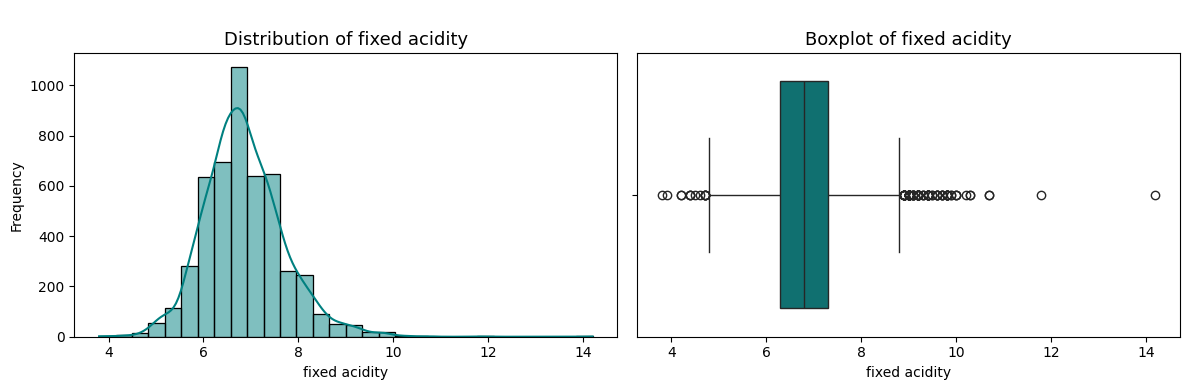

fixed acidity is moderately skewed.


In [24]:
# 1. Fixed Acidity
univariate_numerical_eda(df, 'fixed acidity')

 Feature: fixed acidity
       fixed acidity
count    4898.000000
mean        6.854788
std         0.843868
min         3.800000
25%         6.300000
50%         6.800000
75%         7.300000
max        14.200000
Skewness: 0.648
Kurtosis: 2.172


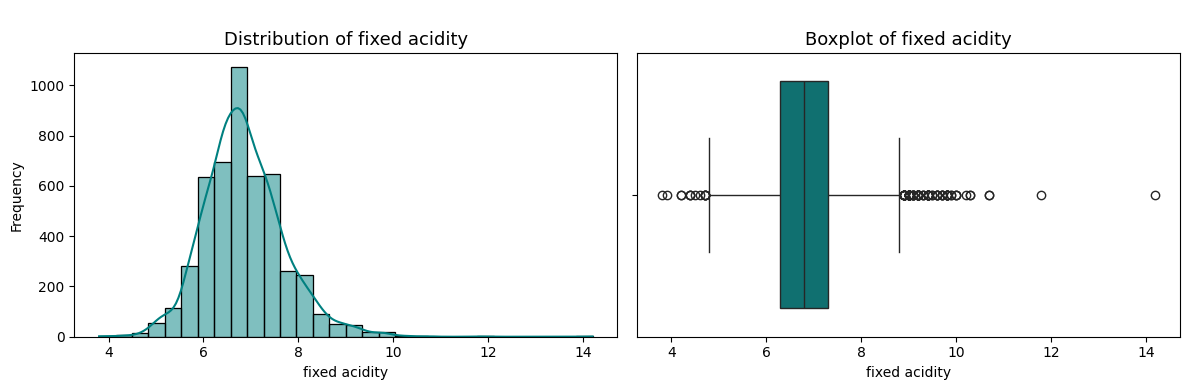

fixed acidity is moderately skewed.
 Feature: volatile acidity
       volatile acidity
count       4898.000000
mean           0.278241
std            0.100795
min            0.080000
25%            0.210000
50%            0.260000
75%            0.320000
max            1.100000
Skewness: 1.577
Kurtosis: 5.092


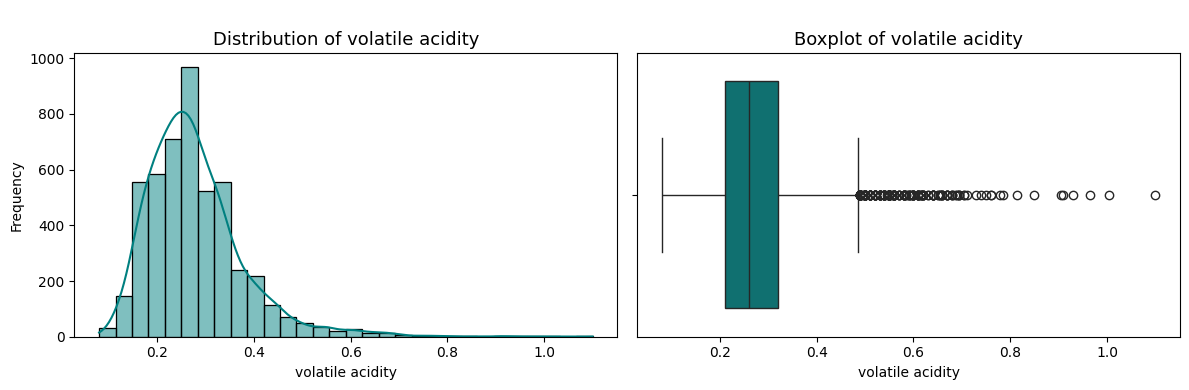


volatile acidity is highly skewed. Consider log or Box-Cox transformation.
 Feature: citric acid
       citric acid
count  4898.000000
mean      0.334192
std       0.121020
min       0.000000
25%       0.270000
50%       0.320000
75%       0.390000
max       1.660000
Skewness: 1.282
Kurtosis: 6.175


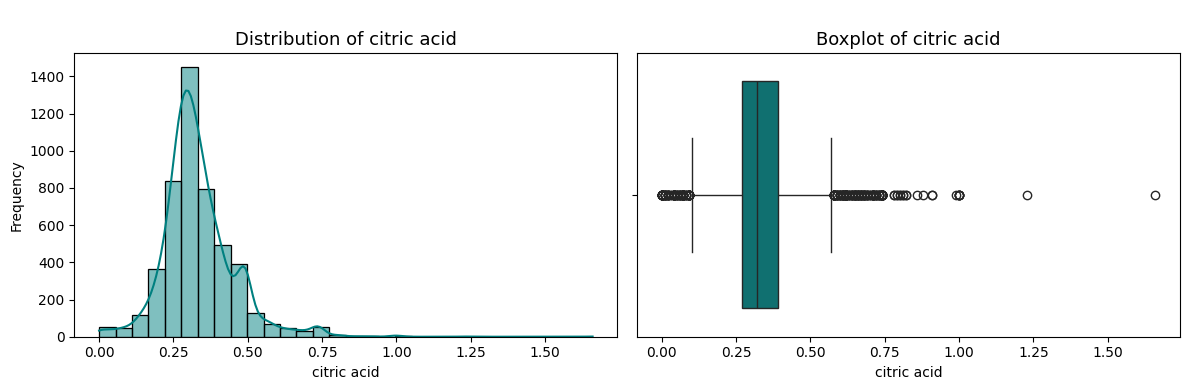


citric acid is highly skewed. Consider log or Box-Cox transformation.
 Feature: residual sugar
       residual sugar
count     4898.000000
mean         6.391415
std          5.072058
min          0.600000
25%          1.700000
50%          5.200000
75%          9.900000
max         65.800000
Skewness: 1.077
Kurtosis: 3.470


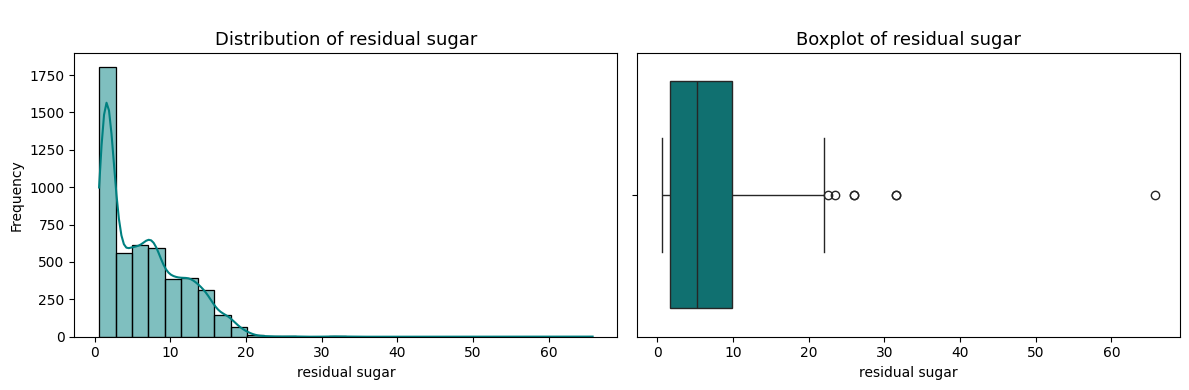


residual sugar is highly skewed. Consider log or Box-Cox transformation.
 Feature: chlorides
         chlorides
count  4898.000000
mean      0.045772
std       0.021848
min       0.009000
25%       0.036000
50%       0.043000
75%       0.050000
max       0.346000
Skewness: 5.023
Kurtosis: 37.565


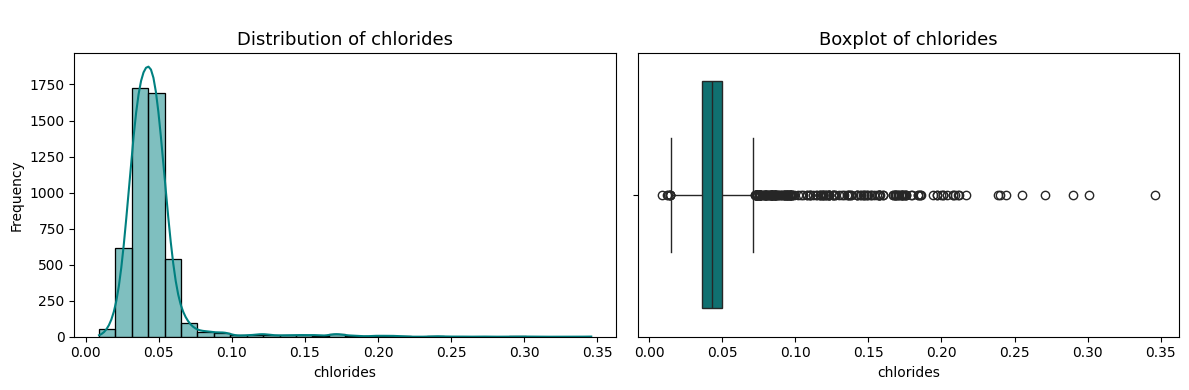


chlorides is highly skewed. Consider log or Box-Cox transformation.
 Feature: free sulfur dioxide
       free sulfur dioxide
count          4898.000000
mean             35.308085
std              17.007137
min               2.000000
25%              23.000000
50%              34.000000
75%              46.000000
max             289.000000
Skewness: 1.407
Kurtosis: 11.466


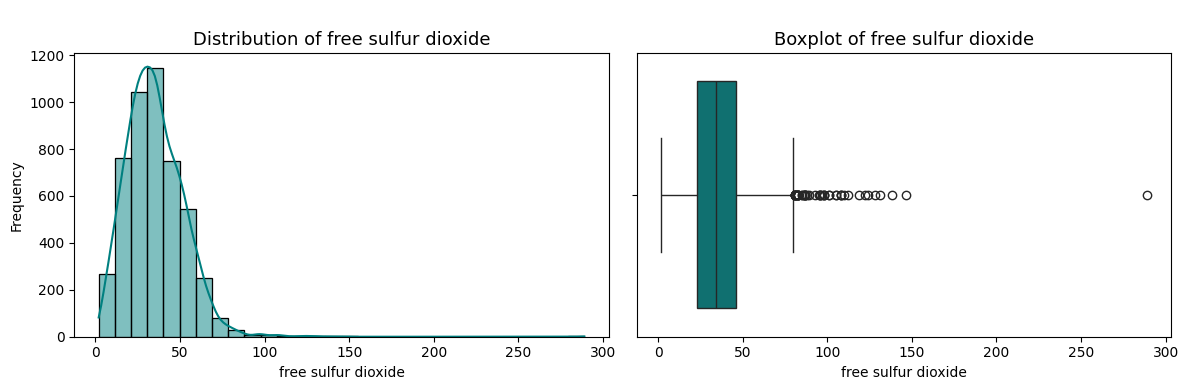


free sulfur dioxide is highly skewed. Consider log or Box-Cox transformation.
 Feature: total sulfur dioxide
       total sulfur dioxide
count           4898.000000
mean             138.360657
std               42.498065
min                9.000000
25%              108.000000
50%              134.000000
75%              167.000000
max              440.000000
Skewness: 0.391
Kurtosis: 0.572


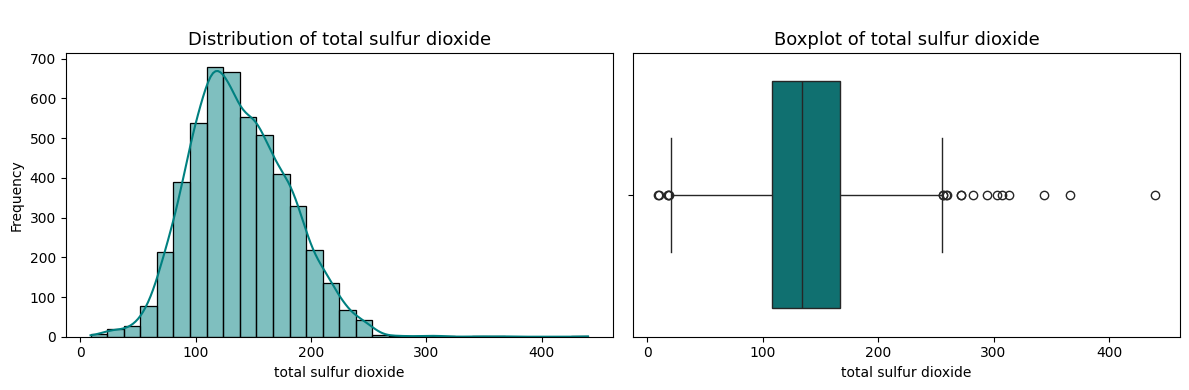

total sulfur dioxide is fairly symmetric.
 Feature: density
           density
count  4898.000000
mean      0.994027
std       0.002991
min       0.987110
25%       0.991723
50%       0.993740
75%       0.996100
max       1.038980
Skewness: 0.978
Kurtosis: 9.794


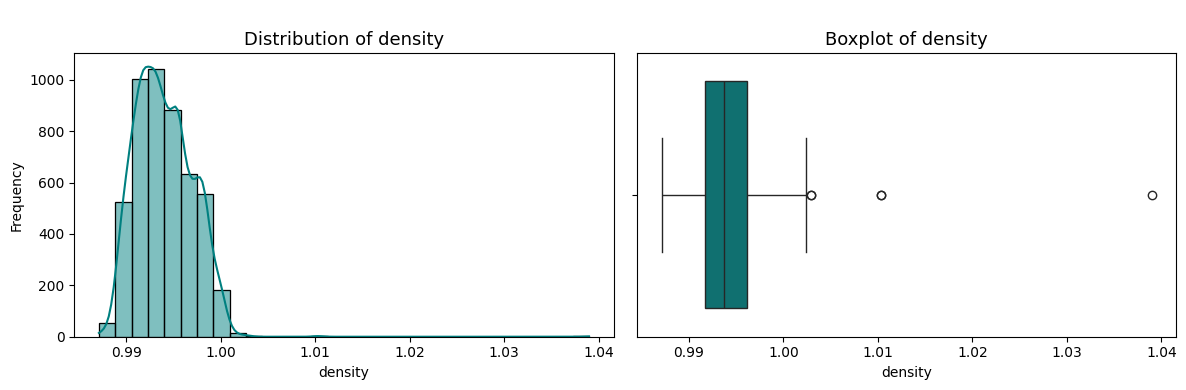

density is moderately skewed.
 Feature: pH
                pH
count  4898.000000
mean      3.188267
std       0.151001
min       2.720000
25%       3.090000
50%       3.180000
75%       3.280000
max       3.820000
Skewness: 0.458
Kurtosis: 0.531


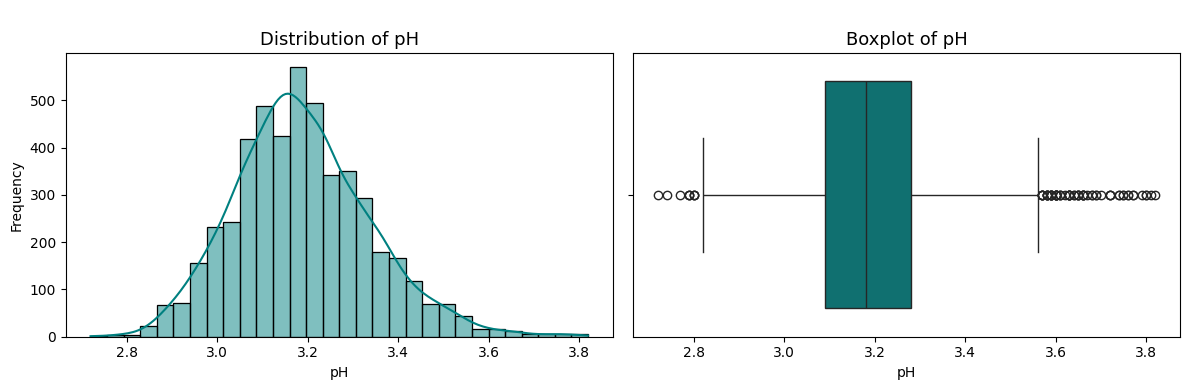

pH is fairly symmetric.
 Feature: sulphates
         sulphates
count  4898.000000
mean      0.489847
std       0.114126
min       0.220000
25%       0.410000
50%       0.470000
75%       0.550000
max       1.080000
Skewness: 0.977
Kurtosis: 1.591


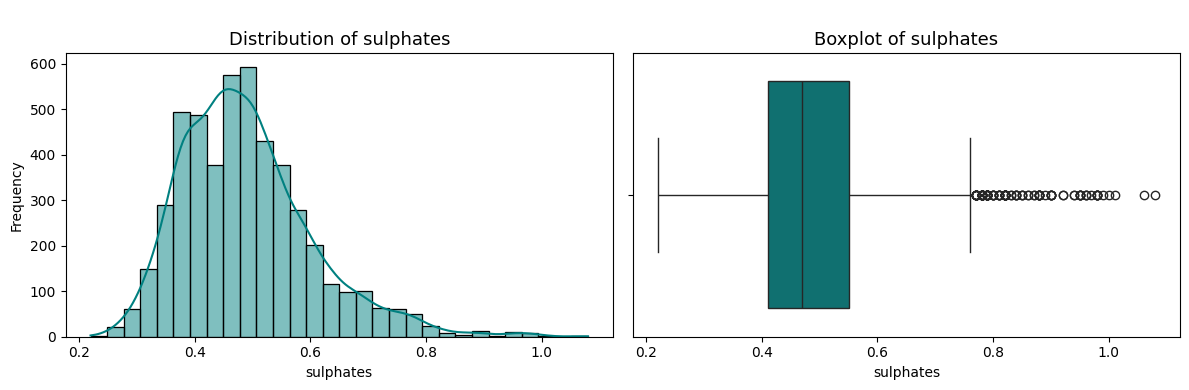

sulphates is moderately skewed.
 Feature: alcohol
           alcohol
count  4898.000000
mean     10.514267
std       1.230621
min       8.000000
25%       9.500000
50%      10.400000
75%      11.400000
max      14.200000
Skewness: 0.487
Kurtosis: -0.698


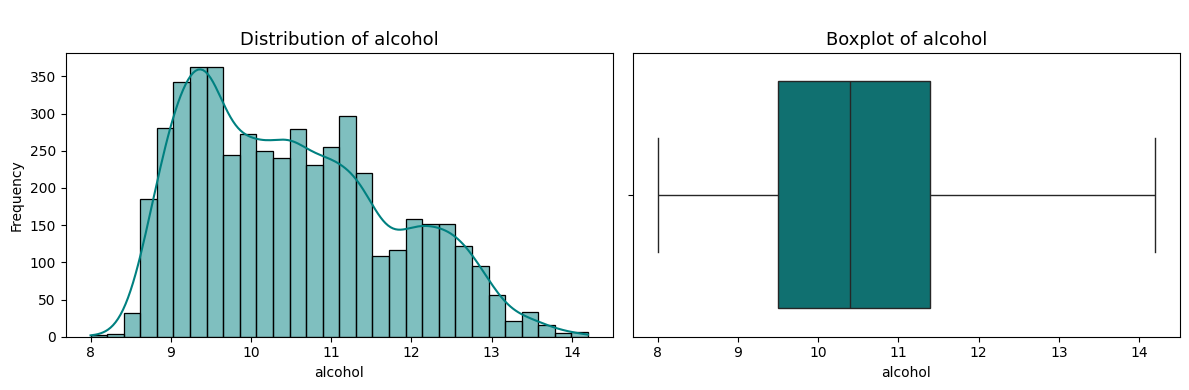

alcohol is fairly symmetric.
 Feature: quality
           quality
count  4898.000000
mean      5.877909
std       0.885639
min       3.000000
25%       5.000000
50%       6.000000
75%       6.000000
max       9.000000
Skewness: 0.156
Kurtosis: 0.217


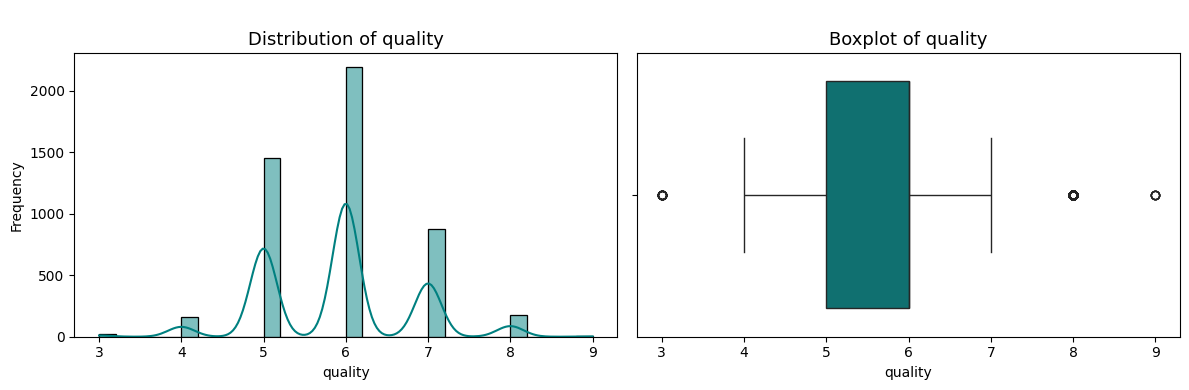

quality is fairly symmetric.


In [25]:
# We can loop to save time
for col in num_cols:
    univariate_numerical_eda(df,col)

In [30]:
def univariate_categorical_eda(df, column):
    """
    Perfroms univariate EDA on a categorical or ordinal column.
    Displays frrequency rable, proportion, and a countplot.
    """
    print(f"Feature: {column}")
    print("="*40)

    # Frequency + proportion
    freq = df[column].value_counts()
    prop = df[column].value_counts(normalize=True) * 100
    summary = pd.DataFrame({'count': freq, 'percentage': prop.round(2)})
    print(summary)
    print()

    # Visualization
    plt.figure(figsize=(8,5))
    ax = sns.countplot(x=column, data=df, palette='Set2', order=freq.index, color='teal')
    plt.title(f'Distribution of {column}', fontsize=13)
    plt.xlabel(column)
    plt.ylabel('count')


    #Annotate each bar with percentage
    total = len(df[column])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2, height + 1,
                f'{(height/total)*100:.1f}%', ha='center')
        
    plt.tight_layout()
    plt.show()

In [31]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_label'],
      dtype='object')

In [32]:
df['quality_label'].unique()

array(['medium', 'high', 'low'], dtype=object)

Feature: quality_label
               count  percentage
quality_label                   
medium          3655       74.62
high            1060       21.64
low              183        3.74



C:\Users\ncc45554\AppData\Local\Temp\ipykernel_16836\2993226872.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='Set2', order=freq.index, color='teal')


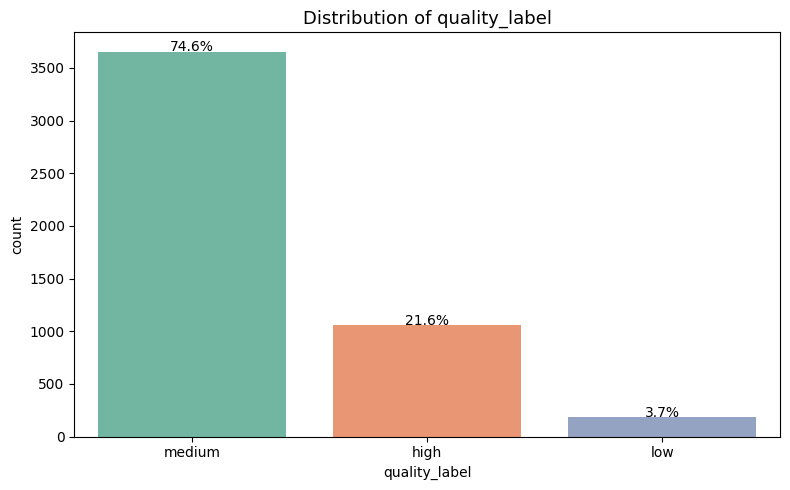

In [33]:
univariate_categorical_eda(df, "quality_label")

### **Bivariate Analysis**

In [34]:
# Let's find the numerical features
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# convert to dataframe
num_cols = pd.DataFrame(df[num_cols])
num_cols.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6
